# Plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


In [ ]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Datasets/diamonds.csv')
print(df.shape)

df = df.sample(frac=0.1,random_state=10)
print(df.shape)

(53940, 10)
(5394, 10)


In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
8018,1.01,Premium,E,SI1,61.7,56.0,4330,6.44,6.39,3.96
1583,0.70,Very Good,D,VS1,60.4,58.0,3008,5.71,5.78,3.47
9138,1.13,Very Good,H,SI2,59.8,59.0,4537,6.75,6.82,4.06
2787,0.76,Ideal,F,VS2,61.0,55.0,3257,5.89,5.92,3.60
52429,0.70,Premium,I,VVS1,61.2,59.0,2513,5.65,5.69,3.47


In [5]:
# Reindexing the data
df.reset_index(drop=True, inplace=True)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,Premium,E,SI1,61.7,56.0,4330,6.44,6.39,3.96
1,0.70,Very Good,D,VS1,60.4,58.0,3008,5.71,5.78,3.47
2,1.13,Very Good,H,SI2,59.8,59.0,4537,6.75,6.82,4.06
3,0.76,Ideal,F,VS2,61.0,55.0,3257,5.89,5.92,3.60
4,0.70,Premium,I,VVS1,61.2,59.0,2513,5.65,5.69,3.47


In [7]:
# Scatter Plot
fig = px.scatter(df,x='carat',y='price')
fig.show()

In [8]:
# Scatter Plot

fig=px.scatter(df,x='carat',y='price',color='cut')
fig.show()

In [12]:
fig=px.scatter(df,x='carat',y='price',color='cut',
               title='Diamond Price VS Carat Weight',
               labels={'carat':'Carat Weight','price':'Price ($)'}
               )
fig.show()

In [15]:
df_mean = df.groupby('carat')['price'].mean().reset_index()
df_mean.head()

,carat,price
0,0.21,386.000000
1,0.23,466.156250
2,0.24,499.121212
3,0.25,538.823529
4,0.26,543.785714


In [14]:
# Line Plot

df_mean = df.groupby('carat')['price'].mean().reset_index()
fig = px.line(df_mean,x='carat',y='price',
              title='Mean Price by Carat'
              )
fig.show()

<Axes: xlabel='clarity', ylabel='price'>

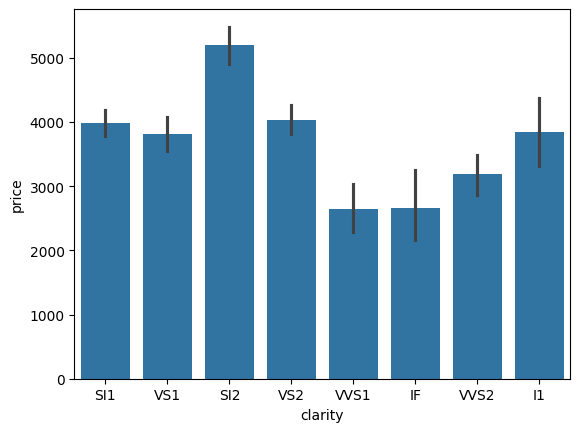

In [ ]:
# Bar plot in seaborn 
sns.barplot(data=df,x='clarity',y='price')

<Axes: xlabel='cut', ylabel='price'>

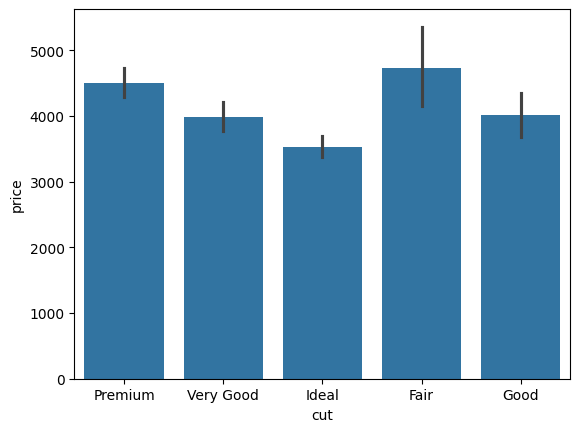

In [21]:
# Bar plot in seaborn 
sns.barplot(data=df,x='cut',y='price')

In [20]:
# Bar plot in Plotly

fig = px.bar(df,x='clarity',y='price',
             title='Average Price by Cut',
             color='cut'
             )
fig.show()

In [22]:
df_stats = df.groupby('cut')['price'].agg(['mean','std']).reset_index()
df_stats.head()

,cut,mean,std
0,Fair,4721.005952,3952.692720
1,Good,4011.286652,3775.099642
2,Ideal,3530.320639,3858.748131
3,Premium,4495.760194,4342.828339
4,Very Good,3987.675314,3929.767320


In [26]:
df_stats = df.groupby('cut')['price'].agg(['mean','std']).reset_index()
df_stats.head()

fig = px.bar(df_stats,x='cut',y='mean',error_y='std',
             title="Average Price by Cut",color='cut'
             )
fig.show()

In [36]:
fig = px.line(df_stats,x='cut',y='mean',markers=True)
fig.show()

In [42]:
fig = px.histogram(df,x='price',nbins=20,
                   title='Price Distribution|'
                   )
fig.show()

In [44]:
fig = px.histogram(df,x='cut',nbins=50,
                   title='Cut Distribution'
                   )
fig.show()

In [47]:
fig = px.histogram(df,x='cut',nbins=50,color='cut',
                   title='Cut Distribution'
                   )
fig.show()

In [48]:
fig = px.histogram(df,x='price',nbins=50,color='cut',
                   title='Cut Distribution'
                   )
fig.show()

In [ ]:
fig=px.box(df,x='cut',y='price',
           title='Price Distribution By Cut'
           )
fig.show()

In [52]:
fig=px.box(df,x='cut',y='price',
           # Outliers
           points='all',
           title='Price Distribution By Cut'
           )
fig.show()

In [54]:
fig=px.box(df,x='cut',y='price',color='clarity',
           title='Price Distribution By Cut'
           )
fig.show()

In [56]:
# Facet Scatter plot

fig= px.scatter(df,x='carat',y='price',
                color='cut',
                facet_col='clarity',
                title='Price VS Carat by Cut and Clarity'
                )

fig.show()

In [69]:
# Animate Frame

fig = px.scatter(df,x='carat',y='price',
                 color='cut',
                 facet_col='clarity',
                 animation_frame='cut',
                 title='Carat VS Price '
                 )

fig.show()

## SubPlots

In [70]:
from plotly._subplots import make_subplots

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Carat Vs Price',
                                    'Density Heatmap of Carat and Price')
                    )

# Scatter Subplot
scatter = px.scatter(df,x='carat',y='price').data[0]
fig.add_trace(scatter,row=1,col=1)

# Density Heatmap
heat_map = px.density_heatmap(df,x='carat',y='price').data[0]
fig.add_trace(heat_map,row=1,col=2)

#Update Plot name
fig.update_layout(title_text = 'Carat VS Price and Density HeatMap')

fig.show()

## 3D Plots

In [72]:
fig = px.scatter_3d(df,x='carat',y='depth',z='price',
                    color='cut',
                    title=' 3D Scatter Plot Of Carat, Depth and Price'
                    )

fig.show()

In [74]:
# 3D Line Plot

fig = px.line_3d(df,x='carat',y='depth',z='price',color='cut')
fig.show()

## Other Plots

In [82]:
fig = px.scatter(df,x='carat',y='price',
                 size='price',
                 color='cut',
                 title=('Bubble Chart : Carat Vs Price With depth')
                 )

fig.show()

In [ ]:
# Area Chart with sorting

df_sort = df.sort_values(by='carat')
fig = px.area(df_sort,x='carat',y='price',title='Cumulative Price by Carat')
fig.show()

In [85]:
fig = px.area(df,x='carat',y='price',color='cut')
fig.show()

In [90]:
# Pie Chart

fig= px.pie(df,names='cut',title='Diamond Cut Distribution')
fig.show()

In [91]:
fig= px.pie(df,names='clarity',title='Diamond Cut Distribution')
fig.show()

In [95]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,Premium,E,SI1,61.7,56.0,4330,6.44,6.39,3.96
1,0.70,Very Good,D,VS1,60.4,58.0,3008,5.71,5.78,3.47
2,1.13,Very Good,H,SI2,59.8,59.0,4537,6.75,6.82,4.06
3,0.76,Ideal,F,VS2,61.0,55.0,3257,5.89,5.92,3.60
4,0.70,Premium,I,VVS1,61.2,59.0,2513,5.65,5.69,3.47


In [100]:
# Treemap

fig = px.treemap(df,path=['cut','clarity','color'],
                 values = 'price',
                 title='Diamond price by cut and clarity'
                 )

fig.show()

In [101]:
# Parallel Coordinates plot

fig = px.parallel_coordinates(df,color='price',title='Parallel Coordinates plot')
fig.show()

In [104]:
# Parallel Coordinates plot using particular dimension

fig = px.parallel_coordinates(df,color='price',
                              dimensions=['carat','depth'],
                              title='Parallel Coordinates Plot'
                              )
fig.show()

In [106]:
# Scatter Matrix for carat,price,depth, and table

fig = px.scatter_matrix(df,
                        dimensions=['carat','price','depth','table'],
                        color='cut',
                        title='Scatter Matrix'
                        )

fig.show()

In [107]:
# Strip Plot

fig = px.strip(df,x='cut',y='price',title='Strip Plot of Cut and Price')
fig.show()

In [110]:
fig = px.strip(df,x='cut',y='price',title='Strip Plot of Cut and Price')

fig.update_traces(jitter=1,marker = dict(size=6))

fig.show()

In [112]:
# Hover Data

fig = px.strip(df,x='cut',y='price',color='clarity',
               hover_data=['carat'],
               title='Strip Plot of Cut and Price')

fig.update_layout(title_font_size=20,
                  xaxis_title = 'Carat Size',
                  yaxis_title = 'Diamond Price'
                  )
fig.show()

In [114]:
# Subbrust Chart

fig = px.sunburst(df,path=['cut','clarity','color'],
                  values='price',
                  title='Subbrust Chart of diamond Price by Cut, Ckarity and Color'
                  )

fig.show()